## Regarding Pitches

Gather the Data of World Cup Venues.

Store and Analyze the Data of Venues.

1. How many mathces are played in those venues after 2012?
2. Out of those, How many does each Team won?
3. What's the winning Percentage of WC Teams?
4. Does Batting First or Second matters in these pitches?
5. What's the average Score necessary to win matches in these Venues?
6. Which Team gets benifit of these Pitches?
7. What are average number of wickets taken per innigs in these Pitches?
8. What are highest Run Scoring Pitches?

## Regarding Batsmen

1. Who are the Best Batsmen to be watched this WC?
2. How many Batsmen have an Average above 40?
3. Who has the Best Batting Average?
4. Who are the top 5 Best Batsman based on Average?
5. Who has the Best Strike Rate?
6. Who are the top 5 Best Batsman based on Strike Rate?
7. Who scored most number of Boundaries?
8. Which Team has most number of Best Batsman?

## Regarding Bowlers

1. Who are the Best Bowlers to be watched this WC?
2. How many Bowlers have an Average less than 40?
3. Who has the Best Bowling Average?
4. Who are the top 5 Best Bowlers based on Average?
5. Who has the Best Strike Rate?
6. Who are the top 5 Best Bowlers based on Strike Rate?
7. Who has the best Economy?
8. Which Team has most number of Best Bowlers?

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [134]:
Batsman_Data = pd.read_csv('Batsman_Data.csv')
Ground_Data = pd.read_csv('Ground_Averages.csv')
ODI_Scores_Data = pd.read_csv('ODI_Match_Totals.csv')
ODI_Results_Data = pd.read_csv('ODI_Match_Results.csv')
WC_Players_Data = pd.read_csv('WC_players.csv')
Bowler_Data = pd.read_csv('Bowler_data.csv')

In [135]:
Batsman_Data.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [136]:
Ground_Data.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [137]:
ODI_Scores_Data.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [138]:
ODI_Results_Data.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [139]:
WC_Players_Data.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [140]:
Bowler_Data.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [190]:
x=Ground_Data['Ground'].unique()
y=[]
k=[]
for i in x:
    if re.search("England",i):
        y.append(i)
y[4]='The Oval, London - England'
for i in range(len(y)):
    y[i]=re.sub(' - England'," ",y[i])
#print(y)

for i in y:
    for j in range(len(ODI_Scores_Data)):
        if re.search(ODI_Scores_Data.Ground[j],i) or re.search(i,ODI_Scores_Data.Ground[j]) :
            k.append((ODI_Scores_Data.Ground[j],i))
k=list(set(k))
l=[]
for i in range(len(k)):
    l.append(k[i][0])
#print((l))   



["Lord's, London ", 'The Rose Bowl, Southampton ', 'Trent Bridge, Nottingham ', 'Sophia Gardens, Cardiff ', 'The Oval, London ', 'Edgbaston, Birmingham ', 'Old Trafford, Manchester ', 'Riverside Ground, Chester-le-Street ', 'Headingley, Leeds ', 'County Ground, Bristol ']
['The Oval', 'Cardiff', 'Chester-le-Street', 'Leeds', 'Birmingham', 'Nottingham', 'Manchester', 'Southampton', 'Bristol', "Lord's"]


In [209]:
wc_Eng_ODISCR=[]
wc_Eng_ODISCR=ODI_Scores_Data[ODI_Scores_Data.Ground.isin([Ground for Ground in l])]
"""for i in range(len(ODI_Scores_Data)):
    for j in range(len(k)):
        if k[j][0]==ODI_Scores_Data.ix[i,"Ground"]:
            print(ODI_Scores_Data.ix[i,"Ground"])"""
wc_Eng_ODISCR.head(10)
      
        
    
    

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,Lord's,31 May 2013,ODI # 3360,Newzealad,5
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,Lord's,31 May 2013,ODI # 3360,England,1
76,558,359/3,50.0,7.18,NaN,1,won,v England,Southampton,2 Jun 2013,ODI # 3361,Newzealad,5
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,Southampton,2 Jun 2013,ODI # 3361,England,1
78,559,253,46.3,5.44,288.0,2,lost,v England,Nottingham,5 Jun 2013,ODI # 3362,Newzealad,5
79,846,287/6,50.0,5.74,NaN,1,won,v New Zealand,Nottingham,5 Jun 2013,ODI # 3362,England,1
80,286,305,50.0,6.10,332.0,2,lost,v India,Cardiff,6 Jun 2013,ODI # 3363,SouthAfrica,3
81,687,331/7,50.0,6.62,NaN,1,won,v South Africa,Cardiff,6 Jun 2013,ODI # 3363,India,6
82,9,172/8,40.4,4.22,171.0,2,won,v Pakistan,The Oval,7 Jun 2013,ODI # 3364,WestIndies,4
83,422,170,48.0,3.54,NaN,1,lost,v West Indies,The Oval,7 Jun 2013,ODI # 3364,Pakistan,7


         index  Country
0      England       68
1    Australia       20
2     Pakistan       18
3     SriLanka       17
4        India       17
5    Newzealad       14
6  SouthAfrica       10
7   WestIndies        8
8   Bangladesh        4


Text(0, 0.5, 'Matches Played')

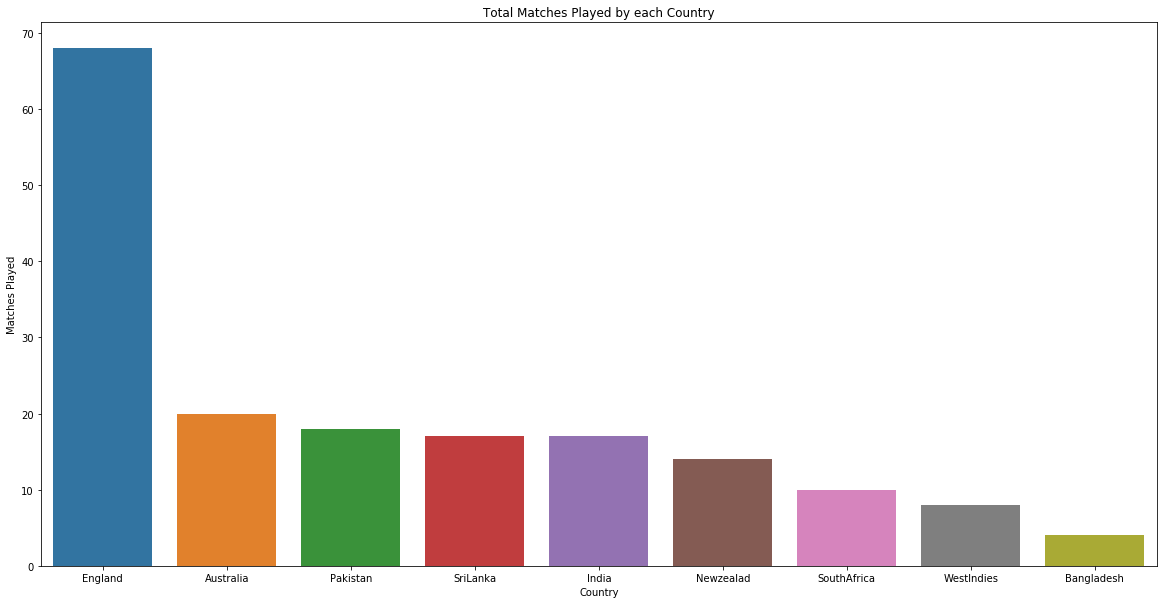

In [231]:
Count=wc_Eng_ODISCR.Country.value_counts().reset_index()
print(Count)
plt.figure(figsize=(20,10))
sns.barplot(x = "index", y = "Country", data = Count).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")



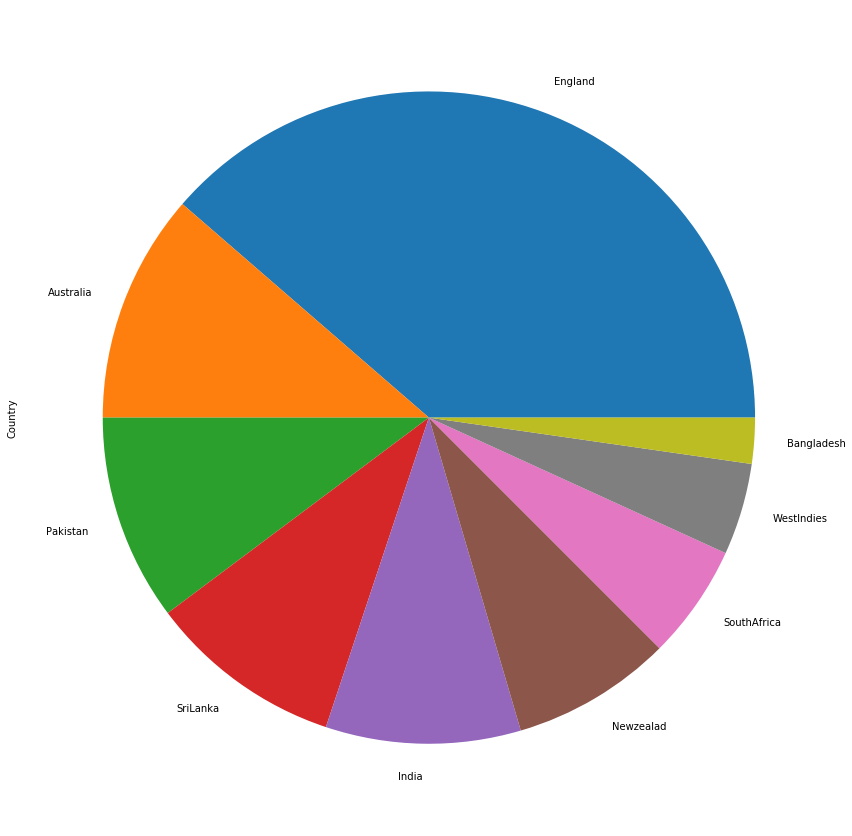

In [230]:
plot = Count.plot.pie(y='Country', figsize=(15, 15))
